In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/code/Chennai.csv")
df = pd.read_csv("/content/drive/MyDrive/code/chennai_weather_processed (2).csv")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
daily_temp = df['temperature_2m'].resample('D').mean()

In [ ]:
split_index = int(len(daily_temp) * 0.9)
train, test = daily_temp[:split_index], daily_temp[split_index:]

# Step 4: Fit ARIMA model (adjust order as needed)
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q)
model_fit = model.fit()



In [ ]:
# Step 5: Forecast
forecast = model_fit.forecast(steps=len(test))



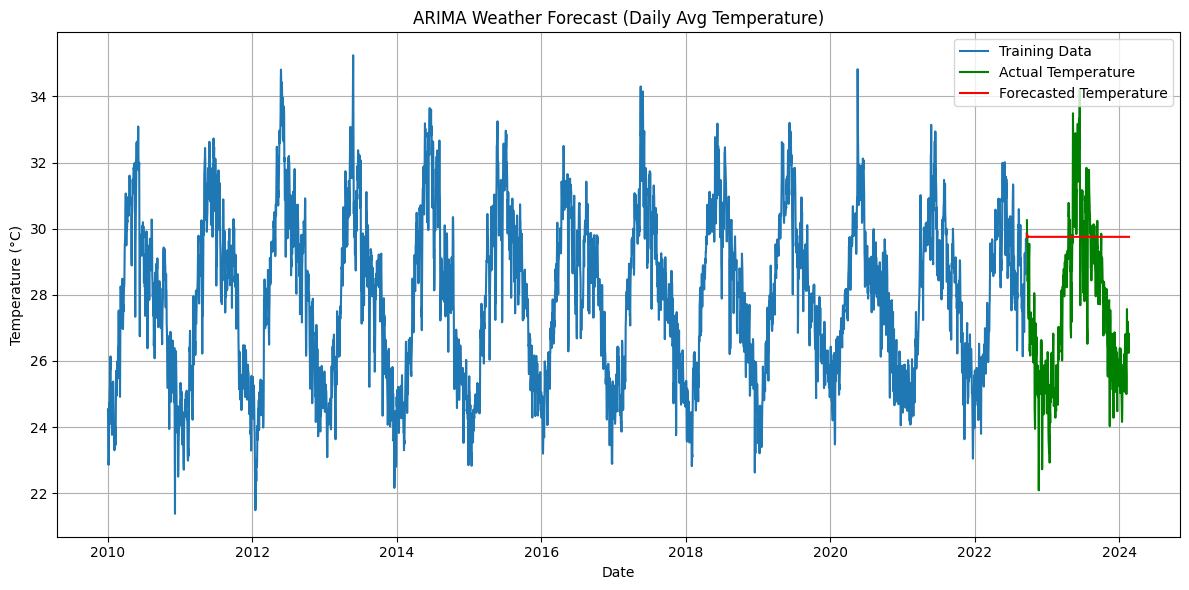

In [ ]:
# Step 6: Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Temperature', color='green')
plt.plot(test.index, forecast, label='Forecasted Temperature', color='red')
plt.title('ARIMA Weather Forecast (Daily Avg Temperature)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

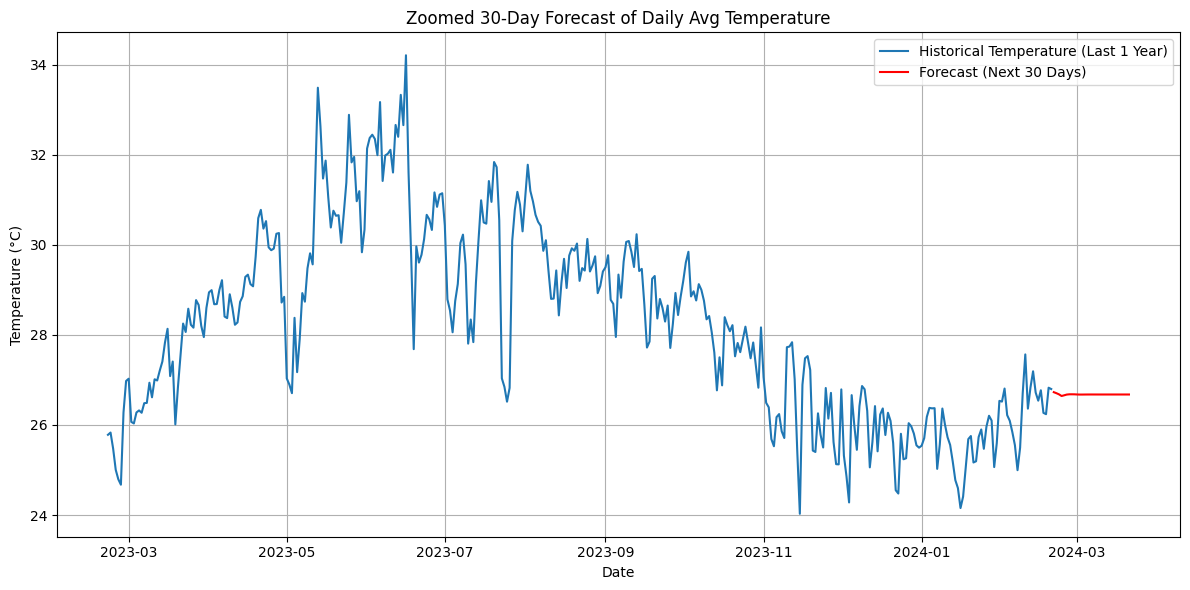

In [ ]:
# Combine recent history with forecast for better zoomed view
zoomed_data = daily_temp[-365:]  # Last 1 year

# Assuming you want to forecast for the next 30 days
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Fit ARIMA model
model = ARIMA(daily_temp, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 30 days
forecast_steps = 30
future_forecast = model_fit.forecast(steps=forecast_steps)
last_date = daily_temp.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)


full_zoomed = pd.concat([zoomed_data, pd.Series(future_forecast, index=future_dates)])

# Plot zoomed-in version
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(zoomed_data.index, zoomed_data, label='Historical Temperature (Last 1 Year)')
plt.plot(future_dates, future_forecast, color='red', label='Forecast (Next 30 Days)')
plt.title('Zoomed 30-Day Forecast of Daily Avg Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [ ]:
# Fit ARIMA model
model = ARIMA(daily_temp, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 30 days
forecast_steps = 30
future_forecast = model_fit.forecast(steps=forecast_steps)
last_date = daily_temp.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Create interactive plot
fig = make_subplots()

# Historical
fig.add_trace(go.Scatter(
    x=daily_temp.index,
    y=daily_temp,
    mode='lines',
    name='Historical Temperature',
    line=dict(color='blue')
))

# Forecast
fig.add_trace(go.Scatter(
    x=future_dates,
    y=future_forecast,
    mode='lines+markers',
    name='Forecast (Next 30 Days)',
    line=dict(color='red'),
    marker=dict(size=5),
    hovertemplate='Date: %{x}<br>Forecasted Temp: %{y:.2f}°C'
))

fig.update_layout(
    title="Interactive 30-Day Forecast of Daily Average Temperature",
    xaxis_title="Date",
    yaxis_title="Temperature (°C)",
    hovermode="x unified",
    template="plotly_white",
    width=1000,
    height=500
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

# Assuming df['temperature_2m'] has a datetime index
daily_temp = df['temperature_2m'].resample('D').mean()

# Fit ARIMA model
model = ARIMA(daily_temp, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the next 7 days from April 15th
forecast_days = 7
future_forecast = model_fit.forecast(steps=forecast_days)

# Generate future dates starting from April 15th, 2025
future_dates = pd.date_range(start='2025-04-15', periods=forecast_days)

# Create a DataFrame with the forecasted data
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Temp': future_forecast})

# Interactive Plotly chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=forecast_df['Date'],
    y=forecast_df['Forecasted_Temp'],
    mode='lines+markers',
    name='Forecast (Next 7 Days)',
    line=dict(color='red'),
    marker=dict(size=4),
    hovertemplate='Date: %{x}<br>Temp: %{y:.2f}°C'
))

fig.update_layout(
    title="Forecasted Daily Avg Temperature for Next 7 Days (ARIMA)",
    xaxis_title="Date",
    yaxis_title="Temperature (°C)",
    hovermode="x unified",
    template="plotly_white",
    width=1000,
    height=500
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from ipywidgets import interact, widgets

# Sample data generation (replace with your actual data loading)
# Assuming df['temperature_2m'] has a datetime index
date_range = pd.date_range(start='2024-01-01', end='2025-04-14', freq='D')
temperature_data = pd.Series([20 + (i % 10) for i in range(len(date_range))], index=date_range)
df = pd.DataFrame({'temperature_2m': temperature_data})

# Resample and prepare daily temperature data
daily_temp = df['temperature_2m'].resample('D').mean()

# Fit ARIMA model
model = ARIMA(daily_temp, order=(5, 1, 0))
model_fit = model.fit()

# Function to calculate dynamic classification based on quantiles
def get_dynamic_classification_thresholds(df):
    # Calculate quantiles for classification
    temp_low = df['temperature_2m'].quantile(0.25)  # 25th percentile (Low)
    temp_high = df['temperature_2m'].quantile(0.75)  # 75th percentile (High)
    return temp_low, temp_high

# Function to classify temperature dynamically based on quantiles
def classify_temp_dynamic(temp, temp_low, temp_high):
    if temp <= temp_low:
        return 'Low'
    elif temp <= temp_high:
        return 'Moderate'
    else:
        return 'High'

# Expanded weather condition classification
def classify_weather_condition(temp, prcp):
    if temp >= 40:
        return "Very High heat expected"  # Extremely high heat
    elif temp >= 35:
        return "High heat expected"  # High heat
    elif temp >= 28:
        return "Mild heat expected"  # Mild heat
    elif temp <= 5:
        return "Cold weather expected"  # Very cold
    elif temp <= 15:
        return "Cool weather expected"  # Cool weather
    elif prcp > 10:
        return "Rain expected"  # Heavy rain
    elif prcp > 5:
        return "Light rain expected"  # Moderate rain
    else:
        return "No rain expected"  # No rain

# Function to forecast and plot based on date range selection
def plot_forecast(start_date):
    # Get dynamic thresholds for classification
    temp_low, temp_high = get_dynamic_classification_thresholds(df)

    # Forecast for the next 7 days starting from the selected start_date
    forecast_days = 7
    future_forecast = model_fit.forecast(steps=forecast_days)

    # Generate future dates for the forecast
    future_dates = pd.date_range(start=start_date, periods=forecast_days)

    # Create a DataFrame with the forecasted data
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Temp': future_forecast})

    # Classify temperatures as Low, Moderate, or High dynamically
    forecast_df['Classification'] = forecast_df['Forecasted_Temp'].apply(classify_temp_dynamic, args=(temp_low, temp_high))

    # Classify weather condition for each forecasted day
    forecast_df['Weather Condition'] = forecast_df.apply(lambda row: classify_weather_condition(row['Forecasted_Temp'], 0), axis=1)  # Assuming no precipitation data for now

    # Interactive Plotly chart
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=forecast_df['Date'],
        y=forecast_df['Forecasted_Temp'],
        mode='lines+markers',
        name='Forecast (Selected Dates)',
        line=dict(color='red'),
        marker=dict(size=4),
        hovertemplate='Date: %{x}<br>Temp: %{y:.2f}°C<br>Classification: %{text}',
        text=forecast_df['Classification']
    ))

    fig.update_layout(
        title="Forecasted Daily Avg Temperature with Classification (ARIMA)",
        xaxis_title="Date",
        yaxis_title="Temperature (°C)",
        hovermode="x unified",
        template="plotly_white",
        width=1000,
        height=500
    )

    fig.show()

    # Display forecast table with classifications
    print("Forecasted Temperatures with Classifications:")
    display(forecast_df)

    # Print the weather conditions based on forecast
    print("\nWeather conditions for the next 7 days:")
    for date, temp, condition in zip(future_dates, future_forecast, forecast_df['Weather Condition']):
        print(f"{date.strftime('%Y-%m-%d')}: {condition}")

# Create interactive widget for start date selection
start_date_widget = widgets.DatePicker(
    description='Start Date',
    value=pd.to_datetime('2025-04-16')  # Default start date
)

# Use the interact function to call the plot_forecast function
interact(plot_forecast, start_date=start_date_widget)


interactive(children=(DatePicker(value=Timestamp('2025-04-16 00:00:00'), description='Start Date'), Output()),…

<function __main__.plot_forecast(start_date)>

from matplotlib import pyplot as plt
_df_0['Forecasted_Temp'].plot(kind='hist', bins=20, title='Forecasted_Temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Weather Condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Forecasted_Temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weather Condition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Forecasted_Temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weather Condition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Forecasted_Temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weather Condition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Forecasted_Temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weather Condition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Forecasted_Temp'].plot(kind='line', figsize=(8, 4), title='Forecasted_Temp')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Weather Condition'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Forecasted_Temp', y='Weather Condition', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

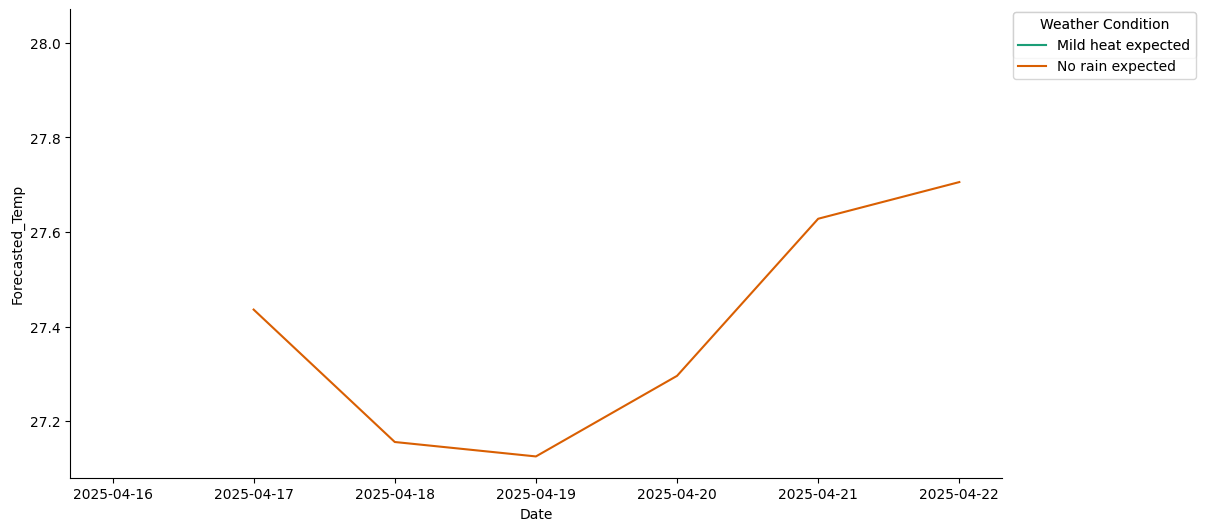

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Forecasted_Temp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weather Condition')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Forecasted_Temp')